In [1]:
# visualization libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# plot the visuals in ipython
%matplotlib inline


{   'eqn_str': 'exp(Abs(x)) * sin(x)',
    'name': 'Lipson_02',
    'noise': 20.0,
    'npts': 500,
    'xs': [x],
    'xs_params': [(-9.7, 9.7)],
    'xs_str': ['x']}
Lipson_02 exp(Abs(x))*sin(x)
(1, 500)


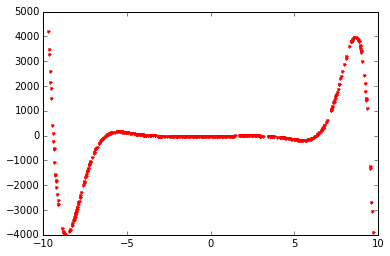

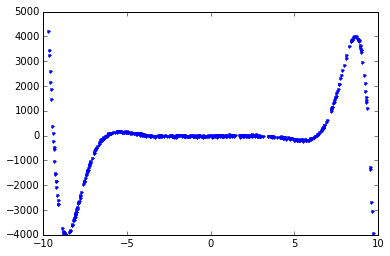

In [2]:
from pypge.benchmarks import explicit
prob = explicit.Lipson_02()

print prob['name'], prob['eqn']
print prob['xpts'].shape

plt.plot(prob['xpts'][0], prob['ypure'], 'r.')
plt.show()
plt.plot(prob['xpts'][0], prob['ypts'], 'b.')
plt.show()



In [ ]:
from pypge.search import PGE
from pypge import expand
from pypge import fitness_funcs as FF
import sympy

pge = PGE(
    system_type = "explicit",
    search_vars = "y",
    usable_vars = prob['xs_str'],
    usable_funcs = [sympy.exp, sympy.cos, sympy.sin, sympy.Abs],
#     usable_funcs = [sympy.cos, sympy.sin],
    pop_count = 3,
    peek_count = 9,
    peek_npts = 100,
    max_iter = 6,
    print_timing = True,
    log_details = True,
    fitness_func = FF.normalized_size_score
    )

pge.fit(prob['xpts'], prob['ypts'])


train.shape: (1, 500) (500,)
peekn.shape: (1, 100) (100,)



Preloop setup
   -1 create first exprs      |   56                  0.07193017 seconds      0.00128447 per item
   -1 first => filtered       |   56 ->   56          0.00706601 seconds      0.00012618 per item
   -1 memoize => algebra      |   56 ->   56          0.42682195 seconds      0.00762182 per item
   -1 algebra => result models|   56 ->   31          0.60996890 seconds      0.01089230 per item
   -1 algebrad => filtered    |   31 ->   31          0.00326610 seconds      0.00010536 per item
   -1 memoized => fitting     |   31 ->   17          0.17024803 seconds      0.00549187 per item

In [4]:
final_paretos = pge.get_final_paretos()
print len(final_paretos)
final_list = [item for sublist in final_paretos for item in sublist]
print len(final_list), "\n\n"

9
72 




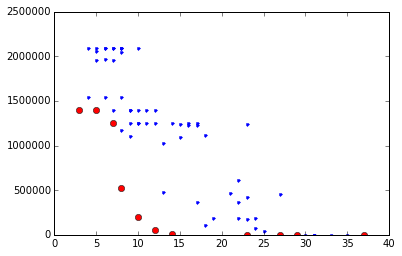

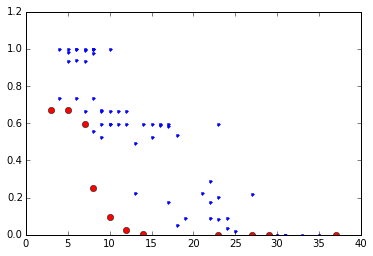

In [5]:
pge_szs = [m.size() for m in final_list]
pge_scr = [m.score for m in final_list]
pge_evar = [1.0 - m.evar for m in final_list]

pge_szs_f = [m.size() for m in final_paretos[0]]
pge_scr_f = [m.score for m in final_paretos[0]]
pge_evar_f = [1.0 - m.evar for m in final_paretos[0]]

plt.plot(pge_szs, pge_scr, 'b.', pge_szs_f, pge_scr_f, 'ro')
plt.show()
plt.plot(pge_szs, pge_evar, 'b.', pge_szs_f, pge_evar_f, 'ro')
plt.show()

    0:   3   1396773.205966    0.331378    0.331506  148.380791*x


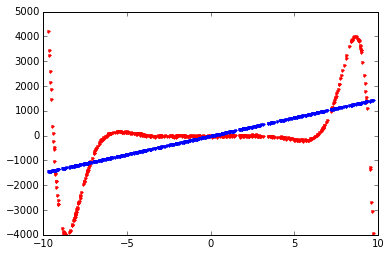

   15:   5   1396504.790789    0.331507    0.331507  148.657754*x + 16.457225


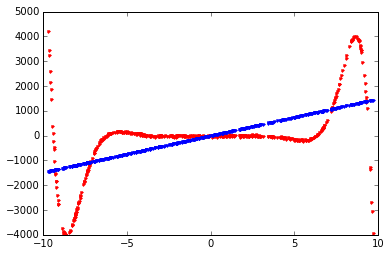

    2:   7   1249594.345378    0.401831    0.401966  2.651375*x**3


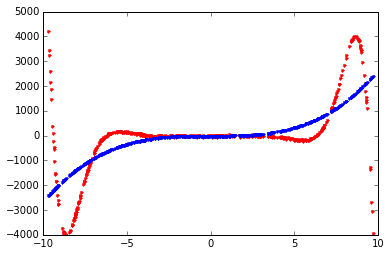

   72:   8    522289.100069    0.749985    0.750051  46.279929*x**2*sin(x)


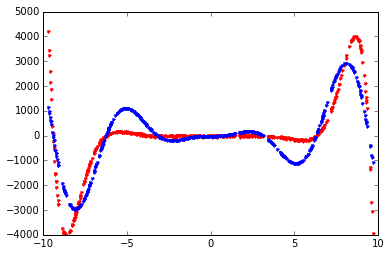

  121:  10    200027.889675    0.904249    0.904660  0.822549*x**4*sin(x)


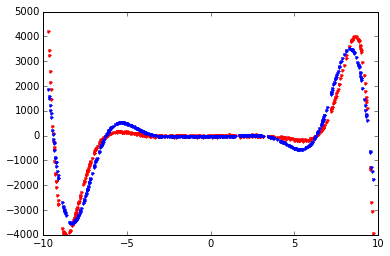

  158:  12     57552.605790    0.972450    0.972692  0.012716*x**6*sin(x)


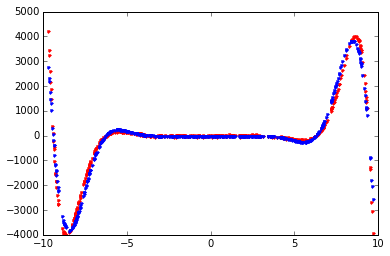

  155:  14      4201.060850    0.997989    0.998007  0.000184*x**8*sin(x)


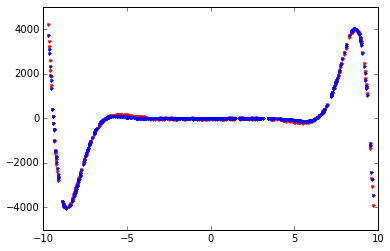

  171:  23      3123.695003    0.998505    0.998505  -0.000187*x**8*cos(1.000121*x + 1.570444) - 6.692711*x + 3.126593


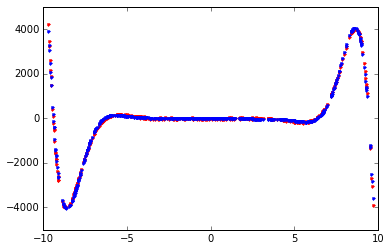

  131:  27      3002.587914    0.998563    0.998563  -0.000188*x**8*cos(0.999295*x + 1.57063) - 0.186909*x**3 + 3.040311


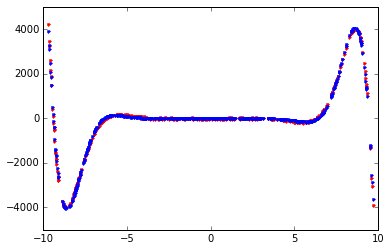

  261:  29      1044.330682    0.999500    0.999500  -0.000178*x**8*cos(1.000495*x + 0.104541*sin(x)*cos(x) + 1.571646) - 3.703193*x - 0.518928


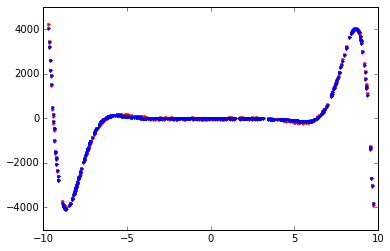

  260:  37       778.183091    0.999627    0.999627  -0.000183*x**8*cos(0.999372*x + 0.161457*sin(x)*cos(x) + 0.076427*sin(x) + 1.571515) - 0.169851*x**3 - 0.21483


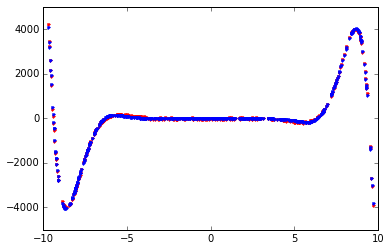

In [9]:
from pypge.evaluate import Eval

for best_m in final_paretos[0]:
    print best_m
    y_pred = Eval(best_m, pge.vars, prob['xpts'])
    plt.plot(prob['xpts'][0], prob['ypts'], 'r.',prob['xpts'][0], y_pred, 'b.')
    plt.show()


In [ ]:
from sympy import *

import networkx as nx
G = pge.GRAPH
n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()
print n_nodes, n_edges

print nx.info(G)

print nx.density(G)

bins = nx.degree_histogram(G)


# pos=nx.graphviz_layout(G,prog="twopi",root=pge.root_model)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)
# nx.draw_circular(G,with_labels=False,node_size=30)

# pos=nx.shell_layout(G,pge.iter_expands)
# nx.draw_networkx(G,pos,with_labels=False,node_size=30)

plt.yscale('log')
plt.bar(range(0,len(bins)),bins)
plt.draw()
